## this is a look at the website that the data came from
 **the data from 2017 to 2021 scraped from levels.fyi website** 
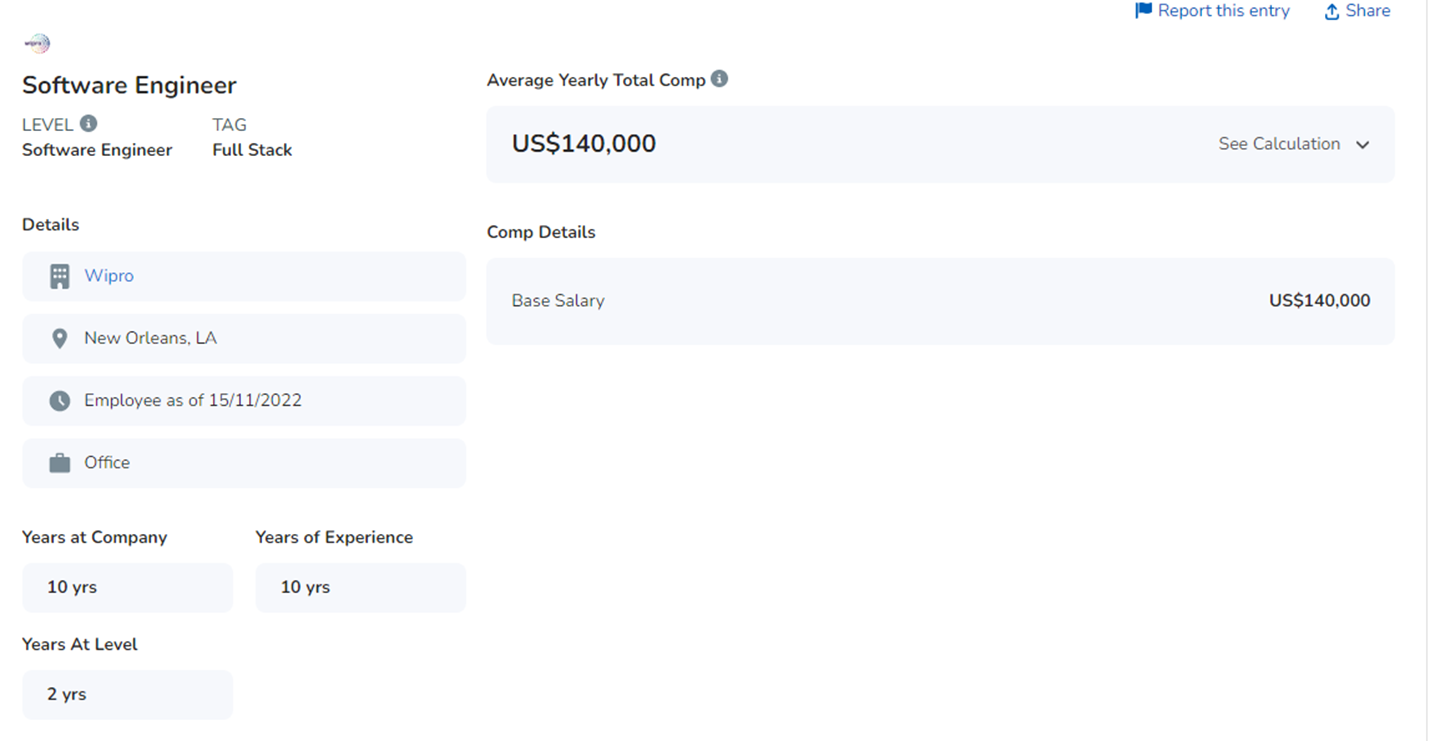


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

In [2]:
# read data 
df = pd.read_csv("../input/data-science-and-stem-salaries/Levels_Fyi_Salary_Data.csv")
# getting all columns displayed 
pd.set_option("display.max_columns", None)
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,7392,807.0,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,7419,807.0,2,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,11527,819.0,3,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,7472,807.0,7,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,7322,807.0,9,0,0,0,0,0,0,0,0,0,0,NaN,NaN


# Exploratory data analysis 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

In [4]:
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,6.264200e+04,62642.000000,62642.000000,6.264200e+04,6.264200e+04,62642.000000,62642.000000,62640.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000
mean,2.163004e+05,7.204135,2.702093,1.366873e+05,5.148608e+04,19334.746588,9856.201989,616.097222,41694.723732,0.245698,0.201223,0.028783,0.005108,0.005667,0.187925,0.128221,0.012835,0.011015,0.018039
std,1.380337e+05,5.840375,3.263656,6.136928e+04,8.187457e+04,26781.292040,6679.104563,289.843390,24488.865879,0.430504,0.400917,0.167196,0.071291,0.075067,0.390655,0.334338,0.112562,0.104373,0.133094
min,1.000000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,1.080000e+05,0.000000e+00,1000.000000,7369.000000,506.000000,20069.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.880000e+05,6.000000,2.000000,1.400000e+05,2.500000e+04,14000.000000,7839.000000,807.000000,42019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.640000e+05,10.000000,4.000000,1.700000e+05,6.500000e+04,26000.000000,11521.000000,807.000000,63021.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.980000e+06,69.000000,69.000000,1.659870e+06,2.800000e+06,1000000.000000,47926.000000,881.000000,83875.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df['level'].unique()

array(['L3', 'SE 2', 'L7', ..., 'L6 (Staff)', 'Mts 1',
       'Bioinformatics Scientist II'], dtype=object)

## Data cleaning 

In [6]:
df.duplicated().sum()

0

In [7]:
# drop useless columns 
df.drop(df.iloc[:, 13:27], inplace=True, axis=1)
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN


In [8]:
df.isna().sum()

timestamp                      0
company                        5
level                        119
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
Race                       40215
Education                  32272
dtype: int64

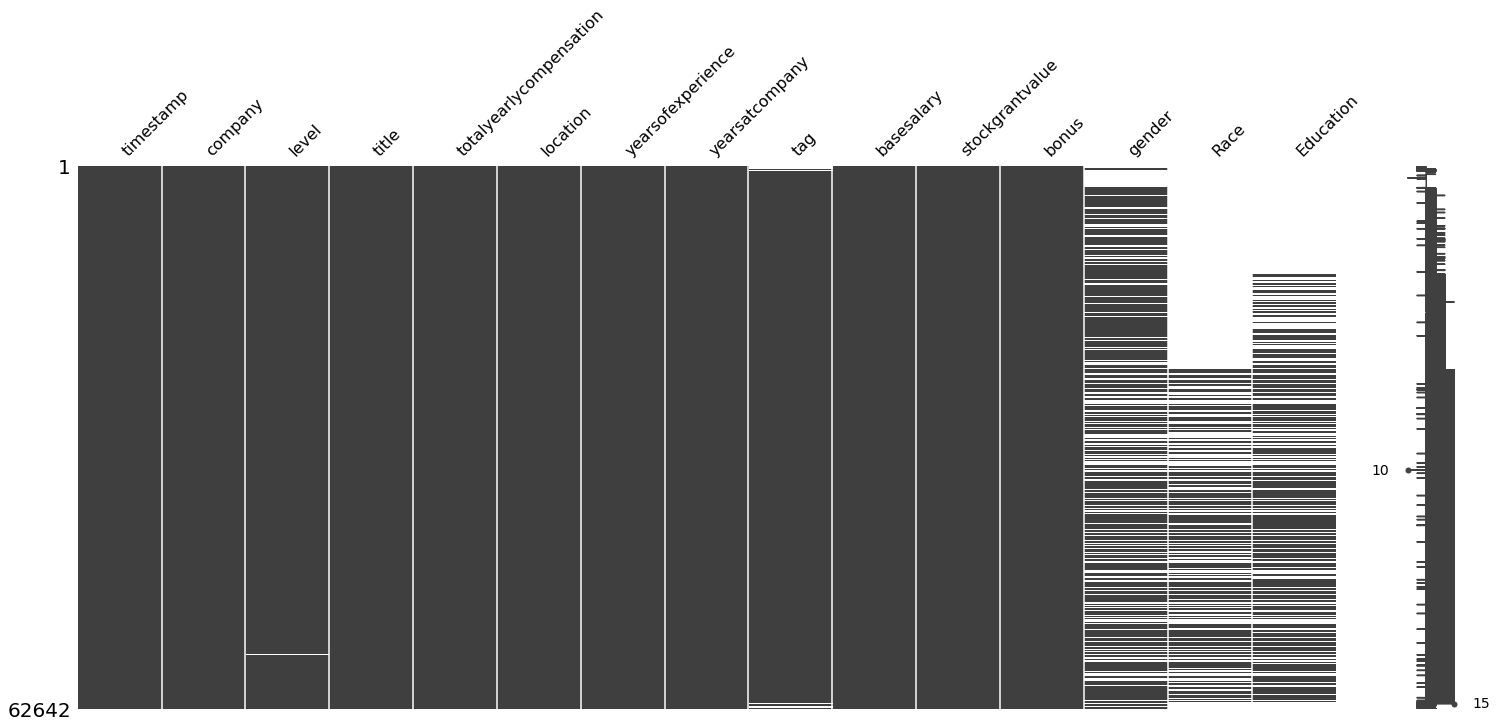

In [9]:
# checking missing values
msno.matrix(df)
plt.show()

**we have a lot of missing values in last 3 columns we will try solve it**

In [10]:
df = df.dropna(subset=['company', 'level','tag'])

### Gender

In [11]:
df['gender'].unique()

array(['Male', 'Female', nan, 'Other', 'Title: Senior Software Engineer'],
      dtype=object)

In [12]:
values = ['Other', 'Title: Senior Software Engineer']
df = df[df.gender.isin(values) == False]
df['gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [13]:
gender_fill_list = ['Female' , 'Male']
df['gender'] = df['gender'].fillna(pd.Series(np.random.choice(gender_fill_list , size = len(df.index) + 2000)))

In [14]:
df['gender'].isna().sum()

0

In [15]:
df['gender'].value_counts()

Male      44818
Female    16453
Name: gender, dtype: int64

### Race

In [16]:
df['Race'].unique()

array([nan, 'White', 'Asian', 'Black', 'Two Or More', 'Hispanic'],
      dtype=object)

In [17]:
race_fill_list = ['White' , 'Asian', 'Black', 'Two Or More', 'Hispanic']
df['Race'] = df['Race'].fillna(pd.Series(np.random.choice(race_fill_list , size = len(df.index) + 2000)))

In [18]:
df['Race'].isna().sum()

0

In [19]:
df['Race'].value_counts()

Asian          19585
White          15809
Hispanic        8723
Black           8643
Two Or More     8511
Name: Race, dtype: int64

### Education


In [20]:
df['Education'].unique()

array([nan, 'PhD', "Master's Degree", "Bachelor's Degree", 'Some College',
       'Highschool'], dtype=object)

In [21]:
edu_fill_list = ['PhD' , "Master's Degree", "Bachelor's Degree", 'Some College', 'Highschool']
df['Education'] = df['Education'].fillna(pd.Series(np.random.choice(edu_fill_list , size = len(df.index) + 2000)))

In [22]:
df['Education'].isna().sum()

0

In [23]:
df['Education'].value_counts()

Master's Degree      21436
Bachelor's Degree    18798
PhD                   7879
Highschool            6621
Some College          6537
Name: Education, dtype: int64

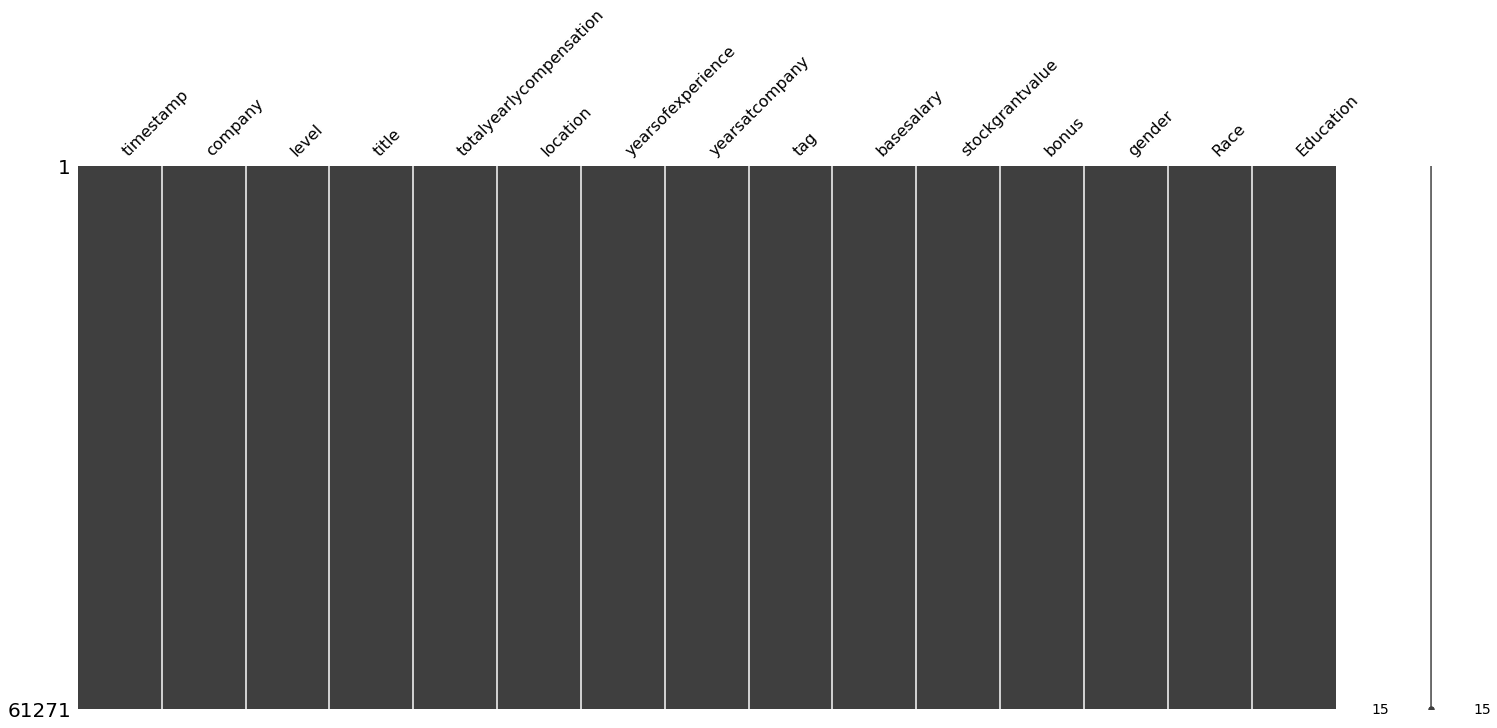

In [24]:
# checking missing values
msno.matrix(df)
plt.show()

In [25]:
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,Race,Education
409,6/3/2018 13:58:20,Yahoo,IC2,Software Engineer,160500,"Sunnyvale, CA",0.58,0.58,Full Stack,128000.0,13000.0,19200.0,Male,Two Or More,Highschool
410,6/4/2018 0:16:01,Oracle,M3,Software Engineering Manager,340000,"Redwood City, CA",16.00,15.00,Distributed Systems (Back-End),206000.0,134000.0,0.0,Male,Two Or More,Some College
411,6/4/2018 19:56:27,Qualcomm,Senior Staff Engineer,Software Engineer,240000,"Santa Clara, CA",15.00,6.00,Embedded Systems,0.0,0.0,0.0,Male,Asian,Some College
412,6/4/2018 20:27:58,Splunk,P2,Software Engineer,160000,"Seattle, WA",5.00,3.00,Full Stack,0.0,0.0,0.0,Male,Black,Bachelor's Degree
413,6/5/2018 12:44:52,Google,L3,Software Engineer,208000,"Mountain View, CA",0.00,0.00,Distributed Systems (Back-End),116000.0,65000.0,17000.0,Male,Hispanic,Highschool


### outliers detection

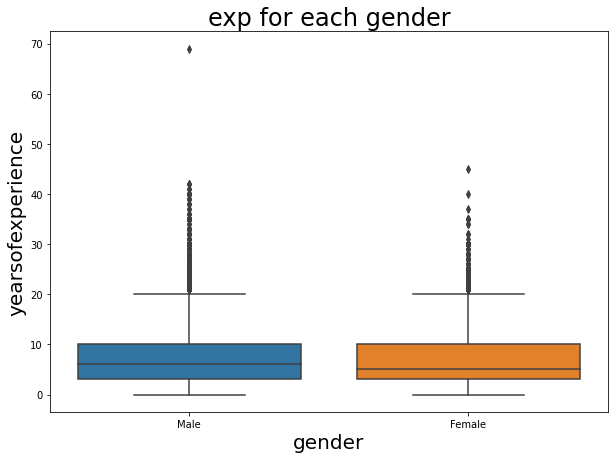

In [26]:
plt.figure(figsize=(10,7))
sns.boxplot(x="gender", y="yearsofexperience", data=df)
plt.title('exp for each gender', fontsize=24)
plt.xlabel("gender", size=20)
plt.ylabel("yearsofexperience", size=20)
plt.show()

**remove outier**

In [27]:
outlier = df[ (df['yearsofexperience'] == 69) | (df['basesalary'] == 1.620000e+06) ].index
df.drop(outlier , inplace=True)
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus
count,6.126900e+04,61269.000000,61269.000000,61269.000000,61269.000000,61269.000000
mean,2.157453e+05,7.204150,2.702810,136642.689713,50913.551049,19251.292085
std,1.379302e+05,5.838297,3.257733,60595.455176,79242.933716,26362.220933
min,1.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,107000.000000,0.000000,1000.000000
50%,1.880000e+05,6.000000,2.000000,140000.000000,25000.000000,14000.000000
75%,2.630000e+05,10.000000,4.000000,170000.000000,65000.000000,26000.000000
max,4.980000e+06,45.000000,40.000000,900000.000000,1000000.000000,1000000.000000


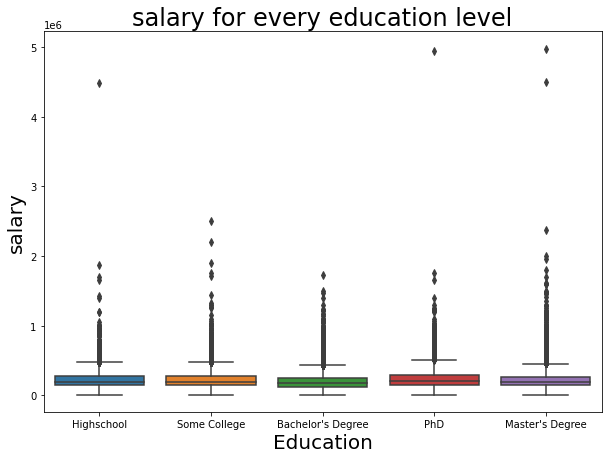

In [28]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Education", y="totalyearlycompensation", data=df)
plt.title('salary for every education level', fontsize=24)
plt.xlabel("Education", size=20)
plt.ylabel("salary", size=20)
plt.show()

In [29]:
df[ (df['totalyearlycompensation'] > 4.000000e+06)]

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,Race,Education
61967,8/20/2019 15:35:10,Microsoft,80,Software Engineering Manager,4950000,"Redmond, WA",24.0,8.0,ML / AI,850000.0,3750.0,350000.0,Male,Asian,PhD
61982,3/9/2021 17:03:07,Google,L10,Product Manager,4500000,"San Francisco, CA",20.0,14.0,Consumer,450000.0,3700.0,350000.0,Male,Asian,Master's Degree
61990,7/2/2021 8:43:37,Facebook,E9,Software Engineer,4490000,"Menlo Park, CA",13.0,9.0,Full Stack,350000.0,4000.0,140000.0,Male,Two Or More,Highschool
61991,7/30/2021 22:23:24,Facebook,E9,Product Manager,4980000,"Menlo Park, CA",17.0,0.0,Product,380000.0,4400.0,200000.0,Male,Asian,Master's Degree


**since the data is real because it is for managers so these are not outliers, no need to clean it**

In [30]:
df = df.astype({"basesalary":'int', "stockgrantvalue":'int', "bonus":'int'}) 

In [31]:
df.yearsofexperience = df.yearsofexperience.round().astype(int)
df.yearsatcompany = df.yearsatcompany.round().astype(int)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61269 entries, 409 to 62641
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   timestamp                61269 non-null  object
 1   company                  61269 non-null  object
 2   level                    61269 non-null  object
 3   title                    61269 non-null  object
 4   totalyearlycompensation  61269 non-null  int64 
 5   location                 61269 non-null  object
 6   yearsofexperience        61269 non-null  int64 
 7   yearsatcompany           61269 non-null  int64 
 8   tag                      61269 non-null  object
 9   basesalary               61269 non-null  int64 
 10  stockgrantvalue          61269 non-null  int64 
 11  bonus                    61269 non-null  int64 
 12  gender                   61269 non-null  object
 13  Race                     61269 non-null  object
 14  Education                61269 non-n

In [33]:
df

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,Race,Education
409,6/3/2018 13:58:20,Yahoo,IC2,Software Engineer,160500,"Sunnyvale, CA",1,1,Full Stack,128000,13000,19200,Male,Two Or More,Highschool
410,6/4/2018 0:16:01,Oracle,M3,Software Engineering Manager,340000,"Redwood City, CA",16,15,Distributed Systems (Back-End),206000,134000,0,Male,Two Or More,Some College
411,6/4/2018 19:56:27,Qualcomm,Senior Staff Engineer,Software Engineer,240000,"Santa Clara, CA",15,6,Embedded Systems,0,0,0,Male,Asian,Some College
412,6/4/2018 20:27:58,Splunk,P2,Software Engineer,160000,"Seattle, WA",5,3,Full Stack,0,0,0,Male,Black,Bachelor's Degree
413,6/5/2018 12:44:52,Google,L3,Software Engineer,208000,"Mountain View, CA",0,0,Distributed Systems (Back-End),116000,65000,17000,Male,Hispanic,Highschool
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,9/9/2018 11:52:32,Google,T4,Software Engineer,327000,"Seattle, WA",10,1,Distributed Systems (Back-End),155000,150000,22000,Female,Black,Some College
62638,9/13/2018 8:23:32,Microsoft,62,Software Engineer,237000,"Redmond, WA",2,2,Full Stack,146900,73200,16000,Male,Black,PhD
62639,9/13/2018 14:35:59,MSFT,63,Software Engineer,220000,"Seattle, WA",14,12,Full Stack,157000,25000,20000,Male,Black,Master's Degree
62640,9/16/2018 16:10:35,Salesforce,Lead MTS,Software Engineer,280000,"San Francisco, CA",8,4,iOS,194688,57000,29000,Male,White,Highschool


In [34]:
df['timestamp'] = pd.to_datetime(df['timestamp']).dt.strftime('%Y-%m')
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,Race,Education
409,2018-06,Yahoo,IC2,Software Engineer,160500,"Sunnyvale, CA",1,1,Full Stack,128000,13000,19200,Male,Two Or More,Highschool
410,2018-06,Oracle,M3,Software Engineering Manager,340000,"Redwood City, CA",16,15,Distributed Systems (Back-End),206000,134000,0,Male,Two Or More,Some College
411,2018-06,Qualcomm,Senior Staff Engineer,Software Engineer,240000,"Santa Clara, CA",15,6,Embedded Systems,0,0,0,Male,Asian,Some College
412,2018-06,Splunk,P2,Software Engineer,160000,"Seattle, WA",5,3,Full Stack,0,0,0,Male,Black,Bachelor's Degree
413,2018-06,Google,L3,Software Engineer,208000,"Mountain View, CA",0,0,Distributed Systems (Back-End),116000,65000,17000,Male,Hispanic,Highschool


In [35]:
df['title'].value_counts()

Software Engineer               40249
Product Manager                  4510
Software Engineering Manager     3491
Data Scientist                   2545
Hardware Engineer                2183
Product Designer                 1488
Technical Program Manager        1370
Solution Architect               1149
Management Consultant             970
Business Analyst                  872
Marketing                         699
Mechanical Engineer               484
Sales                             458
Recruiter                         446
Human Resources                   355
Name: title, dtype: int64

In [36]:
df['company'].value_counts()

Amazon               7919
Microsoft            5052
Google               4215
Facebook             2924
Apple                1969
                     ... 
Quest Diagnostics       1
DISH                    1
capgemini               1
juniper                 1
VmWare                  1
Name: company, Length: 1622, dtype: int64

### checking correlation 

In [37]:
df.corr()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus
totalyearlycompensation,1.000000,0.422443,0.165705,0.684627,0.787714,0.493790
yearsofexperience,0.422443,1.000000,0.522022,0.380107,0.297263,0.263810
yearsatcompany,0.165705,0.522022,1.000000,0.147456,0.093080,0.112044
basesalary,0.684627,0.380107,0.147456,1.000000,0.485537,0.404436
stockgrantvalue,0.787714,0.297263,0.093080,0.485537,1.000000,0.254042
bonus,0.493790,0.263810,0.112044,0.404436,0.254042,1.000000


In [38]:
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,Race,Education
409,2018-06,Yahoo,IC2,Software Engineer,160500,"Sunnyvale, CA",1,1,Full Stack,128000,13000,19200,Male,Two Or More,Highschool
410,2018-06,Oracle,M3,Software Engineering Manager,340000,"Redwood City, CA",16,15,Distributed Systems (Back-End),206000,134000,0,Male,Two Or More,Some College
411,2018-06,Qualcomm,Senior Staff Engineer,Software Engineer,240000,"Santa Clara, CA",15,6,Embedded Systems,0,0,0,Male,Asian,Some College
412,2018-06,Splunk,P2,Software Engineer,160000,"Seattle, WA",5,3,Full Stack,0,0,0,Male,Black,Bachelor's Degree
413,2018-06,Google,L3,Software Engineer,208000,"Mountain View, CA",0,0,Distributed Systems (Back-End),116000,65000,17000,Male,Hispanic,Highschool


# ExplanatoryData Analysis

### 1- what is the highest paied jobs ?

<AxesSubplot:title={'center':'average paying for each title'}, xlabel='Title', ylabel='AVG salary'>

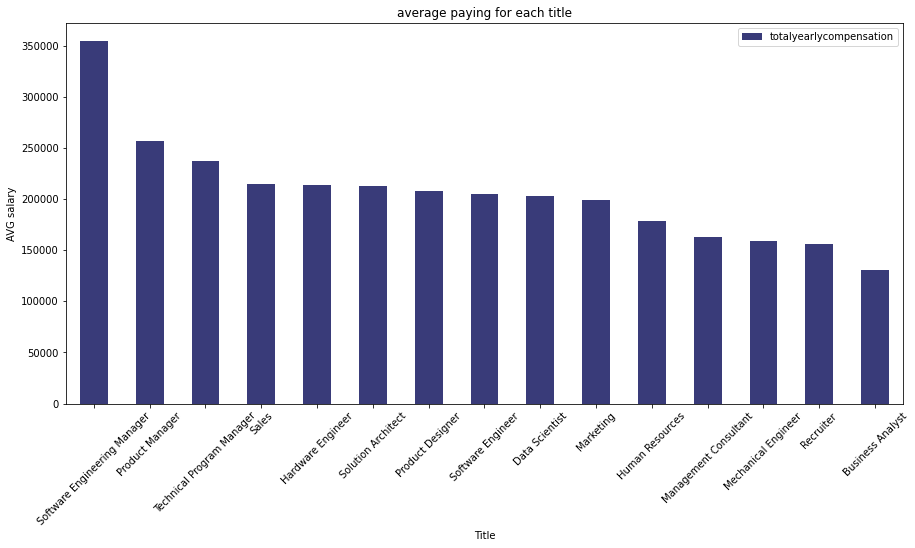

In [39]:
df.groupby(['title']).agg({'totalyearlycompensation':'mean'}).sort_values(by = 'totalyearlycompensation',ascending=False).plot(kind = 'bar',
                                                                                                                               rot = 45,figsize=(15, 7),
                                                                                                                               title = 'average paying for each title',
                                                                                                                               xlabel = 'Title',
                                                                                                                               ylabel = 'AVG salary',
                                                                                                                               colormap = 'tab20b',
                                                                                                                               fontsize=10)

**Conclusion/ it turns out that software engineering manager is the highest paid job**

### 2- what is the number of workers in each title ?

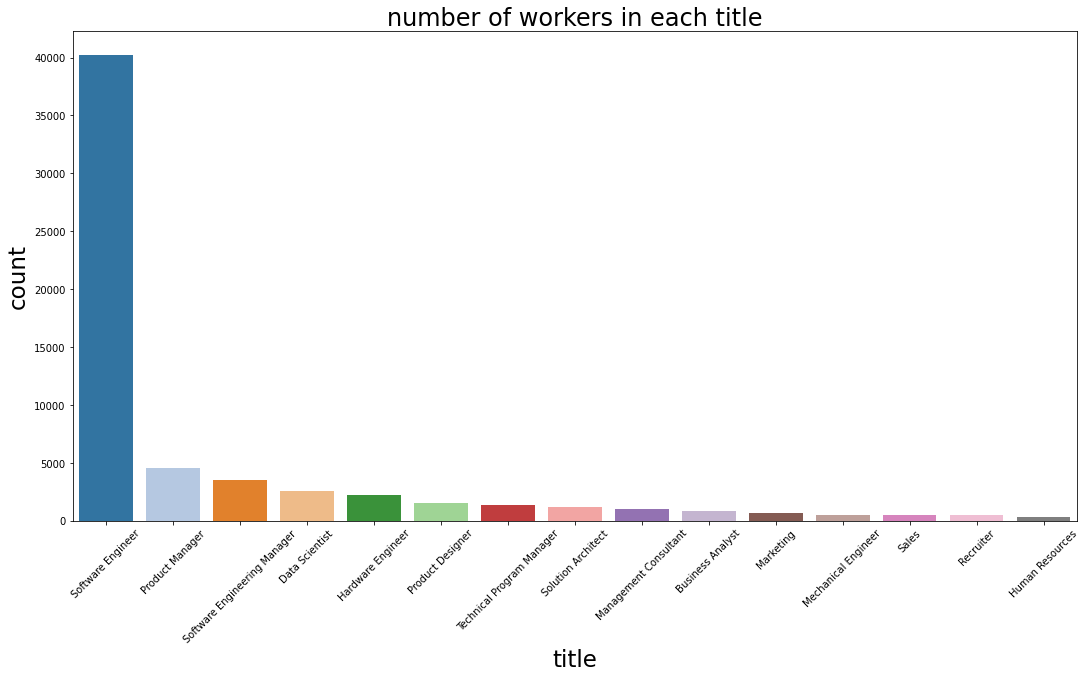

In [40]:
plt.figure(figsize=(18,9))
sns.color_palette("tab10")
plt.title('number of workers in each title', fontsize=24)
plt.xlabel("Title", size=23)
plt.ylabel("Count", size=23)
chart = sns.countplot(x = 'title',
              data = df, palette = 'tab20',
              order = df['title'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

**software engineer is the dominated job here since the website specialised in the tech companies**

### 3- what is the highest paying companies in FAANG ?

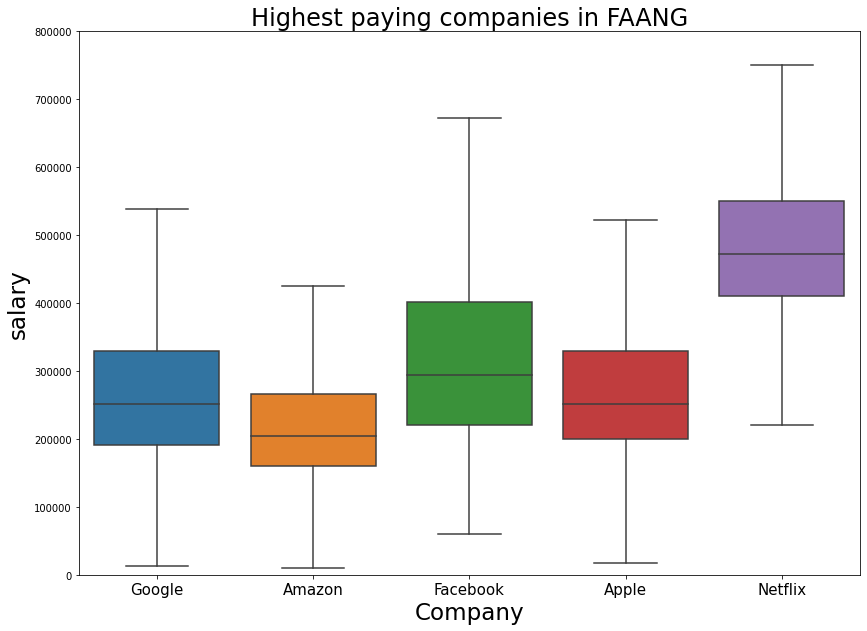

In [41]:
# box plot company/total_yearly_compensation
# select 7 companies
plt.figure(figsize=(14,10))

df_company = df[(df['company'] == 'Amazon') | (df['company'] == 'Google') |
                (df['company'] == 'Facebook') | (df['company'] == 'Apple') | (df['company'] == 'Netflix')]

fig = sns.boxplot(x='company', y="totalyearlycompensation", data=df_company, showfliers = False, palette = 'tab10')
sns.color_palette("tab10")
plt.title('Highest paying companies in FAANG', fontsize=24)
plt.xlabel("Company", size=23)
plt.ylabel("salary", size=23)
plt.xticks(fontsize=15)
fig.axis(ymin=0, ymax=800000);

plt.show()


**Netflix is the highest paying company in FAANG companies**

### 4- what is the top 10 locations that jobs exist ? 

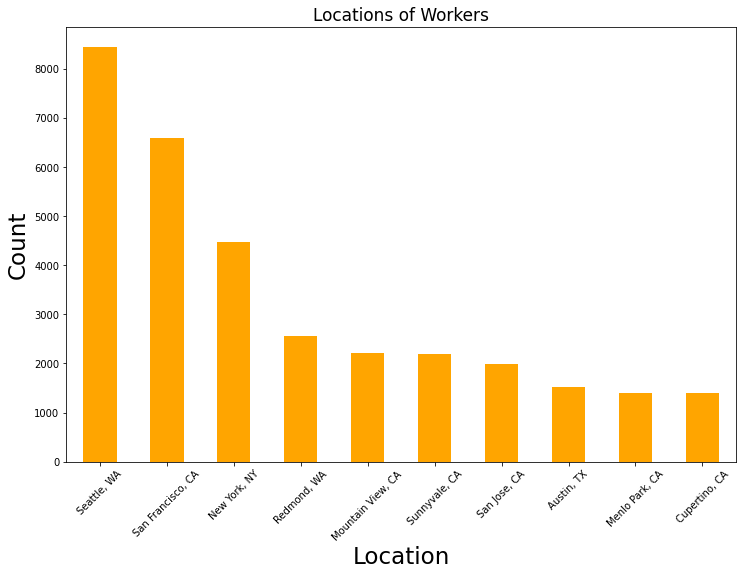

In [42]:
plt.figure(figsize=(12,8))
df["location"].value_counts().iloc[:10].plot(kind="bar", color="orange")
plt.title("Locations of Workers", size=17)
plt.xlabel("Location", size=23)
plt.ylabel("Count", size=23)
plt.xticks(rotation=45)
plt.show()

**all of them in USA specially CA & WA**

### 5- Is there a disparity in salary depends on gender ?


In [43]:
# Filter
company = df.company.value_counts()[df.company.value_counts() >= 100]
company[:11]


Amazon        7919
Microsoft     5052
Google        4215
Facebook      2924
Apple         1969
Oracle        1112
Salesforce    1033
Intel          933
IBM            899
Cisco          887
Uber           859
Name: company, dtype: int64

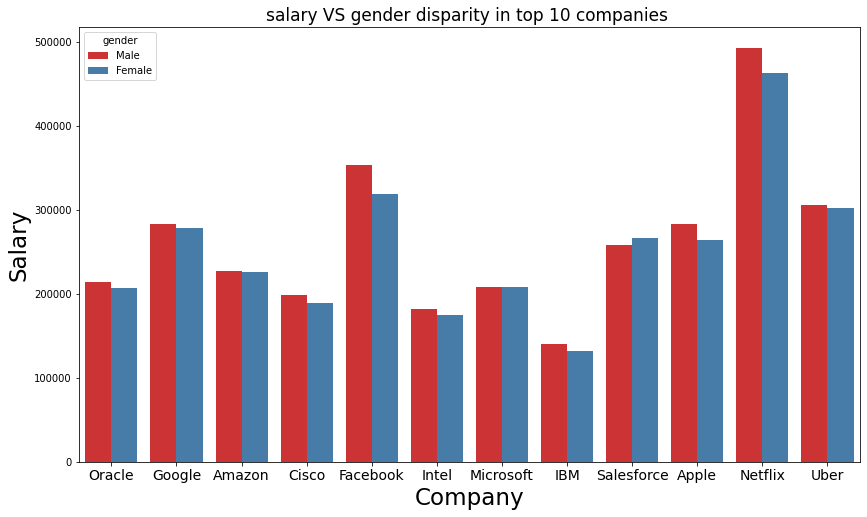

In [44]:
df_company_10 = df[(df['company'] == 'Amazon') | (df['company'] == 'Google') | (df['company'] == 'Microsoft')|
                (df['company'] == 'Facebook') | (df['company'] == 'Apple') | (df['company'] == 'Netflix') | (df['company'] == 'Oracle') |
                (df['company'] == 'Salesforce') | (df['company'] == 'Intel') | (df['company'] == 'IBM') | (df['company'] == 'Cisco') |
                (df['company'] == 'Uber')]
plt.figure(figsize=(14, 8))
sns.barplot(x="company", y="totalyearlycompensation", hue="gender", data=df_company_10, ci=None, palette = 'Set1')
plt.title("salary VS gender disparity in top 10 companies ", size=17)
plt.xlabel("Company", size=23)
plt.ylabel("Salary", size=23)
plt.xticks(fontsize=14)
plt.show()

**there is no disparity in gender**

### 6- Is there a disparity in salary depends on Race ?

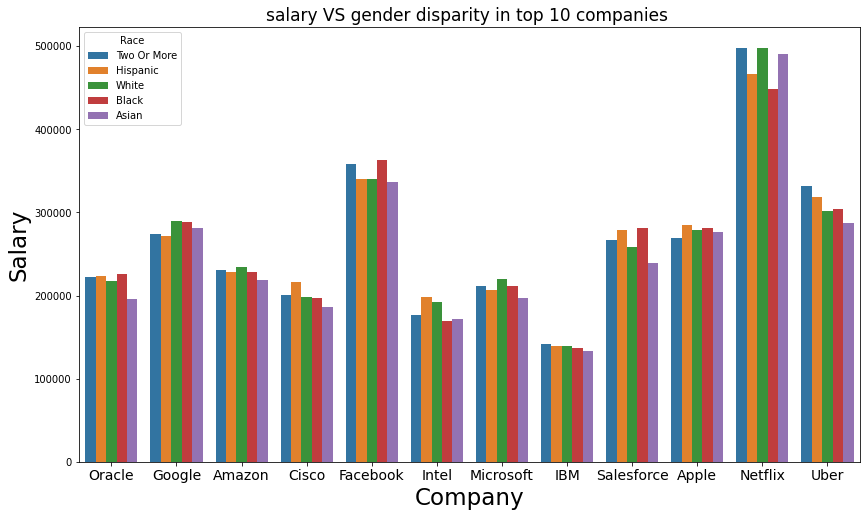

In [45]:
plt.figure(figsize=(14, 8))
sns.barplot(x="company", y="totalyearlycompensation", hue="Race", data=df_company_10, ci=None, palette ="tab10" )
plt.title("salary VS gender disparity in top 10 companies ", size=17)
plt.xlabel("Company", size=23)
plt.ylabel("Salary", size=23)
plt.xticks(fontsize=14)
plt.show()

**there is no disparity in race**

### 7- what is the relation between salary and education ?

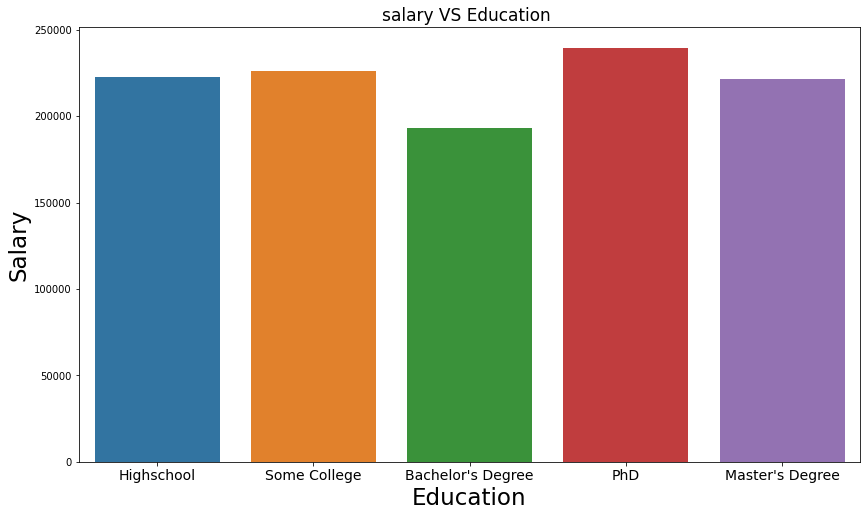

In [46]:
plt.figure(figsize=(14, 8))
sns.barplot(x="Education", y="totalyearlycompensation", data=df, ci=None, palette ="tab10" )
plt.title("salary VS Education ", size=17)
plt.xlabel("Education", size=23)
plt.ylabel("Salary", size=23)
plt.xticks(fontsize=14)
plt.show()

**it seems that it has no big effect but still phD is the most paied category in education** 



### 8- what is the relationship between experience and salary ?

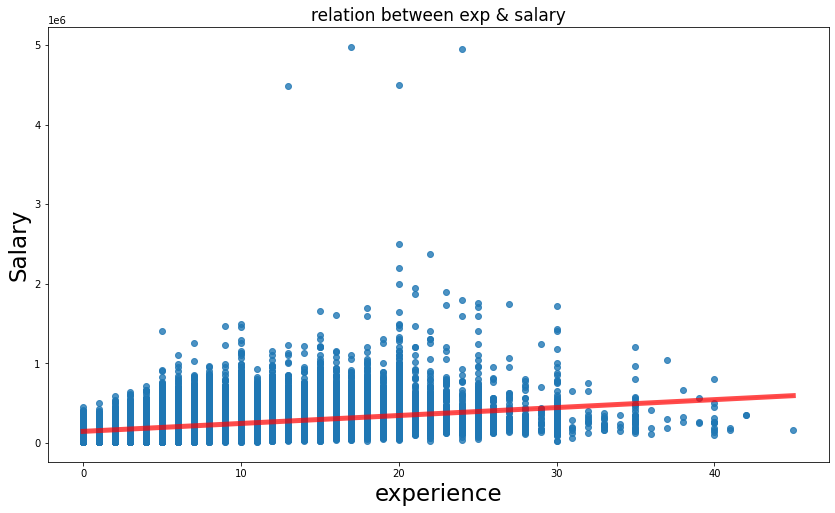

In [47]:
plt.figure(figsize=(14, 8))
sns.regplot(x=df["yearsofexperience"], y=df["totalyearlycompensation"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.title("relation between exp & salary", size=17)
plt.xlabel("experience", size=23)
plt.ylabel("Salary", size=23)
plt.show()

**we have a slightly positive corr**

## modeling

### label encoding 

In [48]:
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'Race', 'Education'],
      dtype='object')

In [49]:
df_lr = df[['title', 'yearsofexperience', 'totalyearlycompensation']]
df_lr.head()

,title,yearsofexperience,totalyearlycompensation
409,Software Engineer,1,160500
410,Software Engineering Manager,16,340000
411,Software Engineer,15,240000
412,Software Engineer,5,160000
413,Software Engineer,0,208000


In [50]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

title_le = LabelEncoder()

In [51]:
df_lr['title'] = title_le.fit_transform(df_lr['title'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
df['title'].value_counts()

Software Engineer               40249
Product Manager                  4510
Software Engineering Manager     3491
Data Scientist                   2545
Hardware Engineer                2183
Product Designer                 1488
Technical Program Manager        1370
Solution Architect               1149
Management Consultant             970
Business Analyst                  872
Marketing                         699
Mechanical Engineer               484
Sales                             458
Recruiter                         446
Human Resources                   355
Name: title, dtype: int64

In [53]:
df_lr['title'].value_counts()

11    40249
8      4510
12     3491
1      2545
2      2183
7      1488
14     1370
13     1149
4       970
0       872
5       699
6       484
10      458
9       446
3       355
Name: title, dtype: int64

In [54]:
df_lr.head()

,title,yearsofexperience,totalyearlycompensation
409,11,1,160500
410,12,16,340000
411,11,15,240000
412,11,5,160000
413,11,0,208000


### Train and test split

In [55]:
x = df_lr.drop(['totalyearlycompensation'] , axis = 1).values
y = df_lr['totalyearlycompensation'].values

In [56]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.30 , random_state = 42)

scaling

In [57]:
from sklearn.preprocessing import RobustScaler
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

## Linear Regression model

In [58]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [59]:
reg.fit(x_train , y_train)
reg.score(x_train , y_train)

0.1791370330744686

In [60]:
reg.score(x_test , y_test)

0.18513002475349216

In [61]:
y_pred = reg.predict(x_test)
df_1 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df_1.head(10)

,Y_test,Y_pred
0,180000,146870.916124
1,440000,226260.169290
2,190000,172400.922493
3,86000,240036.931062
4,336000,206412.855999
5,278000,246107.482582
6,23000,176641.886061
7,178000,295725.765811
8,232000,206412.855999
9,216000,261713.832305


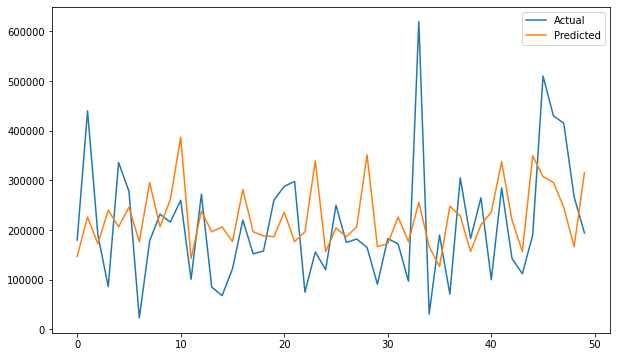

In [62]:
plt.figure(figsize=(10,6))
plt.plot(df_1[:50])
plt.legend(['Actual' , 'Predicted'])

In [63]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error,  r2_score
mse = mean_squared_error(y_test , y_pred)
mse

15313407057.908981

In [64]:
rsq = r2_score(y_test,y_pred)
rsq

0.18513002475349216

## gradient boosting regression

In [65]:
from sklearn import  ensemble
from sklearn.inspection import permutation_importance

In [66]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [67]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(x_train, y_train)

mse = mean_squared_error(y_test, reg.predict(x_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 14583847885.7389


In [68]:
reg.score(x_train , y_train)


0.22205164344773376

In [69]:
reg.score(x_test , y_test)

0.2239519448081858

In [70]:
y_pred = reg.predict(x_test)
df_1 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df_1.head(10)

,Y_test,Y_pred
0,180000,143694.626062
1,440000,229598.301439
2,190000,149619.884446
3,86000,270468.547325
4,336000,215890.063798
5,278000,251338.752137
6,23000,171941.483626
7,178000,287735.613233
8,232000,215890.063798
9,216000,229998.845944


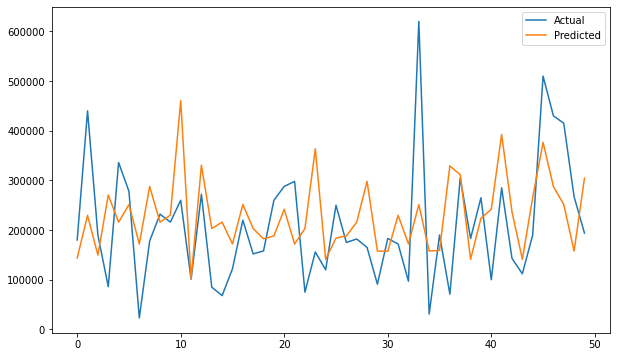

In [71]:
plt.figure(figsize=(10,6))
plt.plot(df_1[:50])
plt.legend(['Actual' , 'Predicted'])

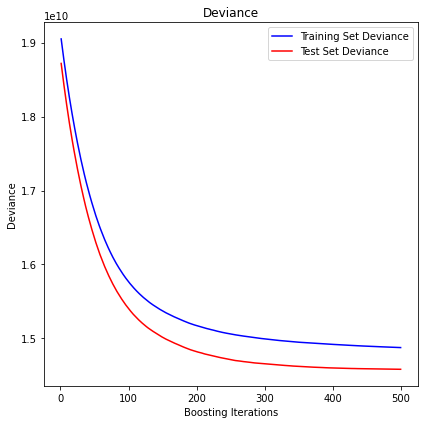

In [72]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(x_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

## elastic net 

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet
from statistics import mean , stdev

In [74]:
# define model
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = abs(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), stdev(scores)))

Mean MAE: 82342.180 (1027.378)


## Stochastic Gradient Descent Regression

In [75]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
sgd = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3)) # Always scale the input. The most convenient way is to use a pipeline.
sgd.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [76]:
y_pred_train_sgd = sgd.predict(x_train)
y_pred_test_sgd  = sgd.predict(x_test)

In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('R-square, Training, SGD: ', r2_score(y_train,y_pred_train_sgd)) #R-Squared from SGD, Training
print('R-square, Training, SGD: ', r2_score(y_test,y_pred_test_sgd)) #R-Squared from SGD, Testing

R-square, Training, SGD:  0.17891979127439261
R-square, Training, SGD:  0.1845988356969771


ridge

In [78]:
BayReg = linear_model.BayesianRidge()
BayReg.fit(x_train, y_train)

BayesianRidge()

In [79]:
df_lr.head()

,title,yearsofexperience,totalyearlycompensation
409,11,1,160500
410,12,16,340000
411,11,15,240000
412,11,5,160000
413,11,0,208000


In [80]:
BayReg.predict([[11,1]])

array([298126.7663868])

## XGBoost

In [81]:
import xgboost as xg


In [82]:
# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
 


In [83]:
# Fitting the model
xgb_r.fit(x_train, y_train)
 


[07:00:45] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=123, reg_alpha=0, ...)

In [84]:
# Predict the model
pred = xgb_r.predict(x_test)


In [85]:
from sklearn.metrics import mean_squared_error as MSE 
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  121023.836312


In [86]:
reg.score(x_train , y_train)


0.22205164344773376

In [87]:
reg.score(x_test , y_test)

0.2239519448081858

In [88]:
y_pred = reg.predict(x_test)
df_2 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df_2.head(10)

,Y_test,Y_pred
0,180000,143694.626062
1,440000,229598.301439
2,190000,149619.884446
3,86000,270468.547325
4,336000,215890.063798
5,278000,251338.752137
6,23000,171941.483626
7,178000,287735.613233
8,232000,215890.063798
9,216000,229998.845944


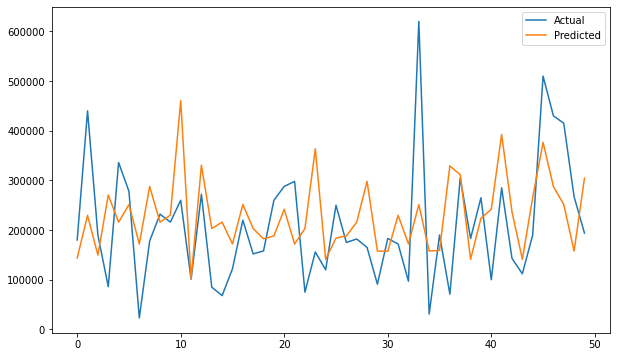

In [89]:
plt.figure(figsize=(10,6))
plt.plot(df_2[:50])
plt.legend(['Actual' , 'Predicted'])

## Ridge regression

In [90]:
reg = linear_model.Ridge(alpha=0.4)
reg.fit(x_train , y_train)


Ridge(alpha=0.4)

In [91]:
reg.score(x_train , y_train)


0.17913703304272588

In [92]:
reg.score(x_test , y_test)


0.18513003666303685

In [93]:
y_pred = reg.predict(x_test)
df_2 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df_2.head(10)

,Y_test,Y_pred
0,180000,146871.893252
1,440000,226260.075220
2,190000,172401.284295
3,86000,240036.535023
4,336000,206413.029728
5,278000,246107.120712
6,23000,176642.461490
7,178000,295724.734442
8,232000,206413.029728
9,216000,261712.989009


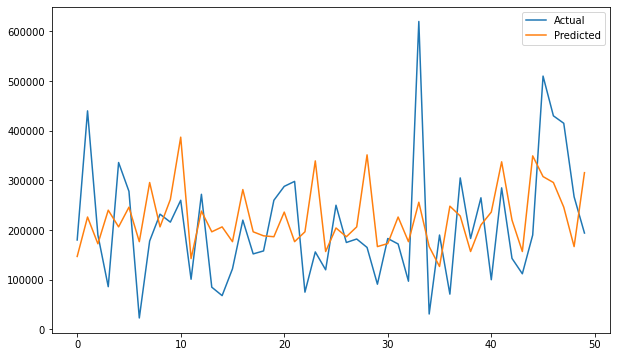

In [94]:
plt.figure(figsize=(10,6))
plt.plot(df_2[:50])
plt.legend(['Actual' , 'Predicted'])

## decision tree 

In [95]:
from sklearn.tree  import DecisionTreeClassifier
dt =DecisionTreeClassifier(max_features=2 , max_depth=3)
dt.fit(x_train , y_train)


DecisionTreeClassifier(max_depth=3, max_features=2)

In [96]:
dt.score(x_train , y_train)

0.023596343965678047

In [97]:
dt.score(x_test , y_test)

0.02192481366628584

[Text(0.5, 0.875, 'X[1] <= -0.071\ngini = 0.995\nsamples = 42888\nvalue = [44, 22, 24, 17, 16, 36, 22, 19, 21, 28, 37, 22\n34, 34, 31, 36, 29, 50, 44, 29, 71, 38, 37, 38\n34, 37, 35, 24, 36, 29, 78, 32, 43, 39, 40, 53\n26, 40, 48, 31, 85, 40, 35, 44, 38, 50, 40, 42\n50, 44, 114, 41, 42, 43, 45, 85, 53, 47, 61, 43\n142, 56, 86, 57, 64, 132, 76, 81, 107, 41, 203\n64, 81, 100, 75, 198, 77, 98, 1, 119, 72, 257\n59, 93, 105, 76, 173, 86, 93, 117, 75, 376, 90\n121, 101, 83, 214, 94, 89, 116, 76, 431, 67, 121\n107, 70, 294, 98, 78, 99, 63, 494, 97, 89, 96\n80, 303, 92, 112, 118, 87, 432, 81, 157, 112, 101\n359, 114, 121, 157, 96, 474, 83, 159, 145, 130\n315, 108, 135, 128, 95, 736, 107, 169, 2, 144, 128\n356, 139, 145, 162, 83, 580, 1, 114, 153, 186, 130\n421, 122, 144, 199, 126, 547, 116, 143, 172, 130\n414, 149, 128, 135, 111, 608, 116, 127, 121, 111\n388, 109, 133, 145, 109, 499, 102, 134, 117, 99\n278, 115, 104, 125, 89, 822, 97, 125, 1, 91, 94\n277, 86, 106, 105, 87, 517, 76, 109, 97, 80

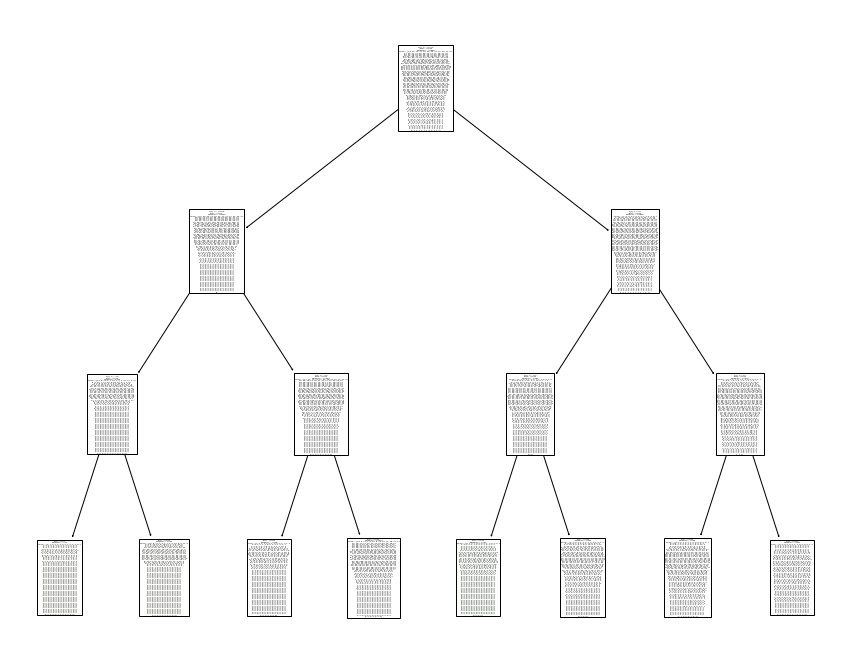

In [98]:
from sklearn import tree
fig = plt.figure(figsize=(15,12))
tree.plot_tree(dt , filled=True)

## Random forest

In [99]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_features=2 ,    max_depth=4)

In [100]:
rf.fit(x_train , y_train) 
rf.score(x_train , y_train)

0.024972020145495242

In [101]:
rf.score(x_test , y_test)

0.021870409662151133

In [102]:
y_pred = reg.predict(x_test)
df_2 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df_2.head(10)

,Y_test,Y_pred
0,180000,146871.893252
1,440000,226260.075220
2,190000,172401.284295
3,86000,240036.535023
4,336000,206413.029728
5,278000,246107.120712
6,23000,176642.461490
7,178000,295724.734442
8,232000,206413.029728
9,216000,261712.989009


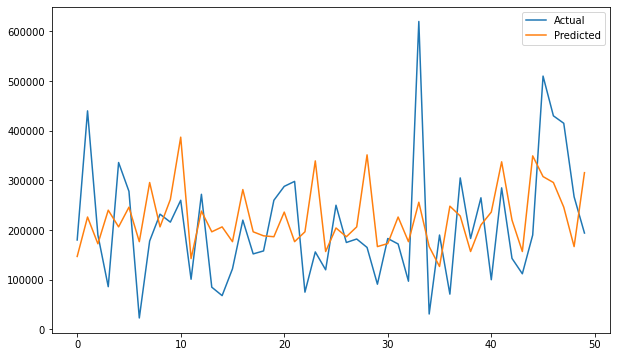

In [103]:
plt.figure(figsize=(10,6))
plt.plot(df_2[:50])
plt.legend(['Actual' , 'Predicted'])

## LGBM Regressor

In [104]:

import lightgbm as lgb

In [105]:
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learnnig_rage': 0.05,
    'metric': {'l2','l1'},
    'verbose': -1
}

In [106]:
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)

In [107]:
model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=30)

[LightGBM] [Warning] Unknown parameter: learnnig_rage
[1]	valid_0's l2: 1.8087e+10	valid_0's l1: 89749.4
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l2: 1.75042e+10	valid_0's l1: 87848.9
[3]	valid_0's l2: 1.70217e+10	valid_0's l1: 86269.4
[4]	valid_0's l2: 1.66372e+10	valid_0's l1: 85021.7
[5]	valid_0's l2: 1.63267e+10	valid_0's l1: 83998.7
[6]	valid_0's l2: 1.60673e+10	valid_0's l1: 83217.7
[7]	valid_0's l2: 1.58414e+10	valid_0's l1: 82542.5
[8]	valid_0's l2: 1.56683e+10	valid_0's l1: 82040.2
[9]	valid_0's l2: 1.55216e+10	valid_0's l1: 81656.9
[10]	valid_0's l2: 1.54038e+10	valid_0's l1: 81374.9
[11]	valid_0's l2: 1.52938e+10	valid_0's l1: 81114.8
[12]	valid_0's l2: 1.52131e+10	valid_0's l1: 80947.8
[13]	valid_0's l2: 1.51478e+10	valid_0's l1: 80840.5
[14]	valid_0's l2: 1.50832e+10	valid_0's l1: 80712.7
[15]	valid_0's l2: 1.50325e+10	valid_0's l1: 80646.9
[16]	valid_0's l2: 1.49785e+10	valid_0's l1: 80573.9
[17]	valid_0's l2: 1.49391e+10	valid_0's l1: 80

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


In [108]:
# prediction
y_pred = model.predict(x_test)

In [109]:
# accuracy check
mse = mean_squared_error(y_test, y_pred)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse) 

MSE: 14585602287.63
RMSE: 120770.87
